In [36]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import linear, relu, sigmoid
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
import matplotlib.pyplot as plt

import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

np.set_printoptions(precision=2)

### Read dataset

In [10]:
train_dataset = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
test_dataset = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')

In [24]:
train_dataset.columns

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)

In [22]:
features[1:]

Index(['pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=784)

In [25]:
X = train_dataset[features[1:]].values
X.shape

(42000, 784)

In [26]:
y = train_dataset[features[0]].values
y.shape

(42000,)

### Separate features columns from label column function 

In [27]:
def separate_features_and_label(dataset):
    features = dataset.columns
    X = dataset[features[1:]].values
    y = dataset[features[0]].values
    
    return X, y

In [29]:
X, y = separate_features_and_label(train_dataset)

In [32]:
X.shape , type(X)

((42000, 784), numpy.ndarray)

In [31]:
y.shape

(42000,)

### Split the training examples into training and validation 

In [41]:
int(np.ceil((1-0.25) * len(X)))

31500

In [42]:
def train_cv_split(X, y, cv_size):
    """
    X: the array which contains the feature columns
    y: the array which contains the label columns
    cv_size: the percentage of splitting the dataset
    
    return: X_train, X_cv, y_train, y_cv 
    
    """
    no_of_training = int(np.ceil((1-cv_size) * len(X)))
    
    X_train = X[0:no_of_training, :]
    y_train = y[0:no_of_training]
    
    X_cv = X[no_of_training:, :]
    y_cv = y[no_of_training:]
    
    return X_train, X_cv, y_train, y_cv

In [43]:
X_train, X_cv, y_train, y_cv = train_cv_split(X, y, 0.25)

In [46]:
X_train.shape, y_train.shape

((31500, 784), (31500,))

In [47]:
X_cv.shape, y_cv.shape

((10500, 784), (10500,))

In [48]:
X_train[0].shape

(784,)

In [49]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

# Build the model

In [118]:
tf.random.set_seed(1234) # for consistent results
model = Sequential(
    [               
        ### START CODE HERE ### 
        tf.keras.Input(shape=(784,)), 
        Dense(units=64, activation='relu', name='L1'),
        Dense(units=64, activation='relu', name='L2'),
        Dense(units=10, activation='linear', name='L3'),
        
        
        ### END CODE HERE ### 
    ], name = "my_model" 
)

In [119]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)

In [120]:
history = model.fit(
    X_train,
    y_train,
    batch_size=64,
    epochs=40,
    validation_data=(X_cv, y_cv),
)

Epoch 1/40
493/493 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 9.7296 - sparse_categorical_accuracy: 0.6730 - val_loss: 0.8095 - val_sparse_categorical_accuracy: 0.8389
Epoch 2/40
493/493 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.7008 - sparse_categorical_accuracy: 0.8472 - val_loss: 0.5420 - val_sparse_categorical_accuracy: 0.8767
Epoch 3/40
493/493 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.4443 - sparse_categorical_accuracy: 0.8925 - val_loss: 0.4660 - val_sparse_categorical_accuracy: 0.8970
Epoch 4/40
493/493 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.3413 - sparse_categorical_accuracy: 0.9141 - val_loss: 0.3838 - val_sparse_categorical_accuracy: 0.9112
Epoch 5/40
493/493 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2762 - sparse_categorical_accuracy: 0.9262 - val_loss: 0.3730 - val_sparse_categorical_accuracy: 0.9197
Epoch 6/40
493/493 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2608 - sparse_categorical_accuracy: 0.9306 - val_loss: 0.3909 - val_sparse_categorical_accuracy: 0.9190
Epoc

### Plot the results

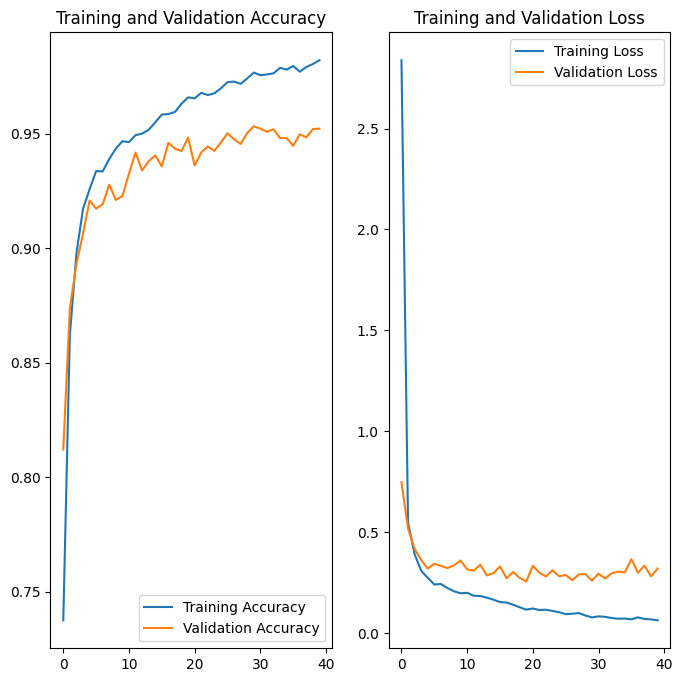

In [95]:
acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(40)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Evaluate the model

In [96]:
test_features = test_dataset.columns

In [97]:
type(test_features)

pandas.core.indexes.base.Index

In [98]:
X_test = test_dataset[test_features[::]].values

In [99]:
X_test.shape

(28000, 784)

In [100]:
prediction = model.predict(X_test)

875/875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [101]:
prediction

array([[-1.79e+01, -4.83e+00,  5.09e+01, ...,  1.14e+00, -2.69e+01,
        -4.14e+01],
       [ 8.52e+01, -3.24e+01,  1.51e+01, ...,  2.44e+01,  1.70e+01,
         1.12e+01],
       [-2.62e+00, -2.92e+00, -3.88e+00, ...,  3.95e+00,  6.23e+00,
         1.25e+01],
       ...,
       [-1.85e+01,  1.21e+01,  1.90e+01, ...,  1.59e+01,  1.67e+01,
         1.18e+01],
       [-8.78e+00, -3.33e+00, -1.45e+00, ...,  5.40e+00,  8.10e+00,
         1.52e+01],
       [-1.15e+01, -1.84e+00,  3.70e+01, ...,  8.43e-02, -1.12e+01,
        -2.13e+01]], dtype=float32)

In [102]:
prediction[1]

array([ 85.17, -32.4 ,  15.06,   3.65, -18.35,  15.45,  -2.82,  24.36,
        16.98,  11.23], dtype=float32)

In [103]:
yhat = []
for i in range(len(prediction)):
    prediction_p = tf.nn.softmax(prediction[i])
    yhat.append(np.argmax(prediction_p))

### Save the prediction into csv file

In [104]:
submit = pd.DataFrame({
    'ImageId': range(1, len(yhat) + 1),
    'Label': yhat
})

In [105]:
submit.to_csv('/kaggle/working/submission1.csv', index=False)